## Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

### EDA & Feature Engineering

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

There are few null values, we will see if we can fill them

In [6]:
# lets check for numeric and categorical features
features = df.columns
numeric = [feature for feature in features if df[feature].dtype != 'O']
categorical = [feature for feature in features if df[feature].dtype == 'O']

In [7]:
print("Numerical features:", numeric)
print("Categorical features:", categorical)

Numerical features: ['year', 'selling_price', 'km_driven', 'seats']
Categorical features: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [8]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [9]:
for feature in categorical:
    if feature in ['name', 'mileage', 'engine', 'max_power', 'torque']:
        continue
    else:
        print(f'\n***** {feature} *****')
        print(df[feature].value_counts())


***** fuel *****
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

***** seller_type *****
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

***** transmission *****
Manual       7078
Automatic    1050
Name: transmission, dtype: int64

***** owner *****
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


'mileage', 'engine', 'max_power', 'torque' can be converted to numeric variable<br>
For rest above feature we can encode them

In [10]:
#float(df['mileage'][0].split(' ')[0])

In [11]:
data = df.copy()
data['mileage'].fillna('0', inplace=True)
mileage_numeric=[]
for i in range(0, len(data)):
    mileage_numeric.append(float(data['mileage'][i].split(' ')[0]))
    print(float(data['mileage'][i].split(' ')[0]))

23.4
21.14
17.7
23.0
16.1
20.14
17.3
16.1
23.59
20.0
19.01
17.3
19.3
0.0
18.9
18.15
24.52
23.0
19.7
22.54
21.0
25.5
26.59
21.5
20.3
21.4
24.7
18.2
18.9
16.8
24.3
0.0
14.0
18.6
24.3
33.44
23.95
17.0
20.63
13.93
16.1
16.0
17.8
16.8
18.5
24.3
23.95
12.55
12.99
14.8
24.7
13.5
26.0
20.65
27.3
11.36
12.99
17.68
14.28
18.53
14.84
21.12
20.36
21.27
26.59
18.16
21.4
22.0
25.1
20.51
21.66
24.3
24.3
20.36
25.2
12.55
22.9
16.02
0.0
20.54
12.99
22.77
15.71
23.1
19.02
24.7
24.7
0.0
19.81
14.0
26.2
16.47
19.81
15.04
18.2
18.5
26.59
19.1
19.7
22.54
21.79
18.8
21.21
15.37
21.4
11.79
19.0
17.0
14.3
15.8
15.1
19.09
22.32
21.9
14.53
21.63
24.3
20.85
20.51
0.0
20.45
19.67
23.0
19.3
23.01
23.1
19.7
20.77
17.92
20.77
17.8
17.01
22.37
19.33
9.5
12.83
13.5
22.48
0.0
16.78
14.67
15.0
13.96
18.0
14.28
18.0
12.07
26.21
13.5
10.8
16.3
13.6
17.0
15.04
16.3
14.3
15.04
16.02
14.74
15.6
19.56
23.95
21.21
11.36
21.5
22.69
19.16
18.12
12.1
17.5
42.0
20.54
18.16
20.0
20.4
20.51
18.6
16.1
21.1
18.9
19.44
18.9
19.1
19.1
13

19.7
19.7
13.1
10.5
13.1
20.77
18.3
20.4
22.07
11.4
19.34
11.79
26.59
15.3
23.01
12.55
13.45
12.9
13.0
14.1
19.0
15.96
14.0
14.95
13.93
23.57
15.1
18.0
19.09
20.36
0.0
19.01
10.91
19.1
18.49
16.1
20.85
21.64
20.45
15.4
20.3
18.6
0.0
28.4
20.0
18.9
14.0
19.81
25.8
19.7
16.95
17.3
22.74
20.8
18.5
21.1
22.7
21.0
15.96
15.37
24.4
15.37
19.7
19.7
19.7
0.0
0.0
17.8
28.4
20.77
24.8
25.83
17.8
20.0
14.0
18.49
25.44
14.28
16.36
22.0
12.8
0.0
18.9
16.8
18.9
21.63
15.73
26.8
19.62
11.36
20.3
17.0
21.63
17.01
24.3
25.83
16.55
21.5
13.96
15.8
17.3
20.4
22.69
19.3
24.3
16.2
12.05
19.2
26.0
16.0
23.95
23.01
15.37
18.49
20.0
12.8
20.77
15.11
16.1
19.09
15.96
21.43
18.2
22.77
12.05
14.0
17.19
16.95
20.89
17.5
22.74
13.1
16.02
12.8
13.93
19.0
18.16
20.36
0.0
22.54
24.2
25.0
21.63
22.74
27.62
14.0
25.83
17.1
23.08
26.21
18.6
18.9
13.1
23.4
14.0
15.1
0.0
13.58
17.3
23.4
15.96
28.4
25.32
22.32
18.9
18.49
18.0
22.74
21.02
21.21
21.9
18.88
23.1
15.1
18.88
21.02
21.21
21.9
18.88
23.1
15.1
18.88
20.45
20.45
11

19.61
13.9
20.77
18.6
14.0
22.7
22.77
17.3
13.8
21.5
23.0
20.4
14.23
20.63
18.0
17.8
23.0
20.0
11.5
25.83
13.96
20.77
22.9
28.4
13.9
27.39
14.07
13.6
22.37
19.33
14.1
18.0
19.16
21.79
27.39
18.2
12.99
22.0
16.78
22.0
24.0
16.78
16.78
19.0
14.3
16.8
13.6
22.37
19.33
14.1
18.0
19.16
21.79
27.39
18.2
12.99
22.0
16.78
22.0
24.0
16.78
16.78
19.0
14.3
16.8
14.8
0.0
13.6
22.37
19.33
14.1
18.0
19.16
21.79
27.39
18.2
12.99
22.0
16.78
22.0
24.0
16.78
16.78
19.0
14.3
16.8
25.01
24.4
20.89
19.1
12.8
24.7
28.09
20.85
22.3
19.67
17.92
16.1
13.8
12.99
21.4
19.09
20.3
17.3
22.9
18.0
18.9
18.15
19.6
11.79
15.1
11.7
15.85
14.53
15.85
17.5
19.3
0.0
19.3
17.8
12.3
15.0
18.2
24.7
26.59
20.36
17.19
15.37
23.87
16.1
18.9
12.99
13.6
22.37
19.33
14.1
18.0
19.16
21.79
27.39
18.2
12.99
22.0
16.78
22.0
24.0
16.78
16.78
19.0
14.3
16.8
17.3
19.81
13.5
19.01
15.96
13.1
17.8
28.4
20.77
24.8
25.83
17.8
20.0
14.0
18.49
25.44
14.28
16.36
22.0
12.8
0.0
18.9
16.8
18.9
21.63
15.04
21.1
0.0
21.21
11.96
12.05
23.59
21.1
13.1

18.5
15.4
25.44
18.88
12.8
19.4
21.19
25.0
20.51
24.3
17.5
18.9
17.7
21.5
12.05
17.5
12.05
22.32
24.7
24.04
17.8
25.2
20.92
26.0
12.8
14.4
20.77
15.3
25.32
22.9
19.7
15.4
23.0
12.05
20.36
18.9
21.1
21.1
17.3
13.4
21.01
20.85
16.0
17.71
18.6
0.0
0.0
19.67
27.39
25.6
23.0
18.9
23.4
19.1
22.54
19.0
18.0
22.54
12.8
22.07
28.09
17.7
14.95
21.1
17.0
19.3
22.0
13.1
19.08
18.49
22.77
25.2
19.44
22.32
26.0
23.4
17.57
19.87
12.99
22.32
23.59
17.5
25.01
20.0
23.95
28.4
21.19
19.62
25.1
26.59
21.0
21.7
27.4
15.0
12.8
15.3
21.0
13.93
15.4
0.0
18.9
19.1
19.67
21.38
21.7
16.1
21.1
10.93
19.67
22.07
16.1
22.0
22.74
24.52
25.2
21.21
15.96
23.08
23.4
22.32
23.59
18.5
15.9
14.0
24.3
21.04
20.77
28.09
21.04
18.6
16.2
16.1
23.95
19.7
14.84
18.06
18.6
16.1
0.0
25.5
15.96
17.8
21.1
25.2
19.09
18.49
18.49
20.5
18.6
21.1
20.63
23.01
10.9
18.9
22.32
19.09
18.5
17.2
17.0
16.95
16.8
20.36
16.47
18.44
16.7
16.95
18.6
18.6
20.3
23.95
17.01
24.0
18.6
11.57
23.57
25.0
17.8
17.8
18.6
19.81
17.4
24.2
18.49
18.6
19.67
2

14.1
18.0
19.16
21.79
27.39
18.2
12.99
22.0
16.78
22.0
24.0
16.78
16.78
19.0
14.3
16.8
17.0
23.4
18.2
21.1
25.83
24.29
22.77
21.19
21.1
17.8
15.3
18.16
20.0
26.59
23.59
13.68
14.4
20.3
14.53
13.5
24.3
24.52
24.3
21.1
23.9
12.99
19.7
20.77
25.2
11.36
22.7
17.8
21.5
15.37
25.17
15.3
15.1
15.0
24.0
22.54
15.37
23.0
14.21
17.6
21.4
16.25
25.2
20.52
13.68
22.95
19.0
25.2
20.14
18.0
12.62
20.4
24.7
18.49
16.1
25.4
27.39
22.0
27.39
20.36
23.84
18.6
21.1
18.15
12.99
19.6
25.0
23.65
12.99
22.0
15.8
21.7
21.7
18.5
22.9
24.7
17.4
19.7
21.1
22.32
25.2
18.16
20.37
28.09
19.7
18.49
16.07
17.8
12.99
19.6
25.0
23.65
12.99
22.0
15.8
21.7
21.7
18.5
22.9
24.7
17.4
19.7
21.1
22.32
25.2
18.16
20.37
28.09
18.9
25.0
16.02
20.77
20.85
17.7
16.1
0.0
22.74
24.7
19.7
20.51
16.6
21.04
13.4
24.4
22.0
25.2
21.9
23.95
0.0
19.81
22.54
20.0
27.62
22.9
27.39
22.3
17.88
13.93
18.9
17.2
17.8
15.96
11.72
21.1
16.1
19.09
20.36
22.74
18.6
15.3
18.2
16.5
22.32
19.01
24.7
20.51
19.4
24.52
20.92
25.4
18.9
14.8
14.7
19.7
19.87


In [12]:
data = df.copy()
data['engine'].fillna('0', inplace=True)
engine_numeric=[]
for i in range(0, len(data)):
    engine_numeric.append(int(data['engine'][i].split(' ')[0]))
    print(int(data['engine'][i].split(' ')[0]))

1248
1498
1497
1396
1298
1197
1061
796
1364
1399
1461
993
1248
0
1061
1198
1248
1396
796
1396
1461
1498
1248
1248
1199
1197
796
1248
1061
796
1248
0
796
1197
1248
796
998
1591
1198
2179
796
1368
1497
1497
1197
1248
998
2982
2494
2143
1498
2477
1498
1462
1498
2755
2494
1968
1798
1968
2143
1248
1197
1396
1248
1196
1197
1498
1498
998
1498
1248
1248
1197
1248
2982
1248
1373
0
1598
2494
1498
1998
998
1198
796
796
0
1086
796
998
1198
1086
1598
998
1197
1248
1197
796
1396
998
1248
1197
1196
1197
2179
1194
1591
1798
1172
2179
1405
1582
1396
1798
998
1248
1197
998
0
1461
1582
1498
1248
999
998
796
1248
1086
1248
1198
1968
2487
1999
3604
1999
2987
1995
0
1995
1798
2143
1451
1497
1798
1969
2967
1248
2987
2497
1797
1999
1198
1598
1797
1598
1991
1373
1991
1497
1197
998
1197
2755
1497
1995
2494
1995
2362
1373
1969
1598
1196
1399
1197
998
1197
796
1248
1197
999
1197
1197
1197
1493
1364
796
2982
1198
1248
1497
993
998
1599
1197
1341
1197
1248
1199
1248
0
1497
1198
998
1197
1197
0
998
1197
796
1197
119

1248
998
796
1497
1498
1498
1198
0
2755
1248
1199
1248
2179
2835
1396
2494
1197
2179
1498
1373
1599
1197
2494
1991
1364
1399
1197
1956
1194
1199
1405
1197
1248
814
1497
796
1498
1248
998
1582
1396
995
1198
1399
1399
0
2179
1373
1461
1248
1599
1997
1197
1591
1582
1991
2494
1198
1197
1498
799
796
1248
1197
936
1197
796
2092
995
0
2179
796
1248
995
998
0
2987
998
2523
999
2523
2755
1396
1493
1405
814
2523
2953
1969
1595
3198
1396
1199
1396
2755
1997
1499
1248
1248
2179
1396
1396
796
1396
1248
1396
1197
1197
1405
1497
1199
1196
796
2496
1199
1405
1198
1968
2487
1999
3604
1496
1496
2494
1248
1199
998
2494
1497
1197
1248
1995
1995
1199
1496
1405
1461
1497
1396
1248
1968
1248
993
1497
1248
998
796
1248
1461
796
796
796
796
1493
2179
1493
1248
1991
1197
1199
2494
1198
2179
1248
1596
999
2982
1086
1799
2489
2179
998
2523
2523
2489
2179
1396
2179
1248
1396
1197
0
1461
3198
1405
1493
796
1197
1461
1461
2179
998
1197
0
1248
1399
1061
2498
1086
1498
796
1498
1061
796
1461
1197
814
799
1461
2523
119

796
1198
1248
1598
1405
1196
1493
1248
2179
1197
2609
0
998
1197
1199
1248
2179
2523
2523
1396
1197
0
1405
1197
999
1396
998
2179
2982
2523
1396
2523
0
1248
1120
1396
1248
999
1199
1493
796
1598
1120
1399
998
2523
1193
1497
1396
814
796
2179
1497
2179
2494
2179
796
796
1396
1399
796
814
2523
814
2523
1248
796
909
1396
1373
2523
2179
2200
1462
1248
1498
1493
1197
796
2523
1396
1405
1248
1498
0
1120
1197
1596
2179
1197
1373
1197
1199
1196
624
998
2179
2523
1197
2499
1248
1193
2362
2523
1196
799
1396
1248
1198
1582
2179
1582
1396
1197
1388
814
1197
1248
1582
1197
1248
1364
1120
1498
998
1198
1582
1197
1364
1197
1248
998
1461
1248
2179
1495
1086
796
1405
1399
1248
1248
1498
2179
1498
1496
1248
1248
814
1199
1396
1364
1248
1248
1248
1498
1248
1497
1197
1248
2755
1196
1388
2179
1197
1197
998
1298
1199
1248
2179
1086
1248
2523
1248
1498
936
1493
1364
2499
1248
1061
998
1794
1248
1248
1061
814
1997
1086
998
1197
998
1248
1197
799
1499
1197
0
2494
1248
1248
1198
1248
1399
1405
2179
1364
1086
81

1396
1047
1498
1248
796
995
1199
1598
998
1598
1388
1248
1498
1248
1248
0
1248
796
2523
0
1248
1582
1461
1248
0
998
2179
1493
0
998
796
1598
1248
1047
796
2494
1248
1120
1197
998
1248
1497
1599
1248
2179
1196
1396
1248
1197
1396
2179
1493
1498
2179
1197
1197
1248
936
1396
995
1197
2179
814
936
1197
998
998
1197
1399
1248
2179
1582
796
1498
2148
1396
1248
1248
1498
1968
1396
1197
1498
1498
1497
1248
1197
2494
1498
1498
1248
998
1248
1248
1493
796
2993
1498
998
1198
1495
1248
1198
1493
1598
1497
2179
1461
1598
1061
1248
1199
1198
1196
1248
1968
1197
2498
1248
1493
1493
1498
1248
998
1396
1196
2494
1461
1248
1396
796
796
1405
1061
1197
1396
1396
1248
1405
1582
1896
1496
1461
1186
1086
796
1061
1968
1396
1197
2179
0
1493
1248
1498
2956
1396
1399
1399
1248
1991
1248
1461
1248
1493
1405
1994
1498
1298
1599
1497
1198
1396
0
1248
1498
2982
814
993
2523
814
1086
1999
2487
1999
2179
1969
2494
998
1248
1199
2494
1197
1496
1197
1186
1995
1995
1199
1598
1984
1248
1197
1586
1248
1197
1086
1197
814
1

1498
1582
1199
1120
1999
2487
1999
2179
1969
2494
998
1248
1199
2494
1197
1496
1197
1186
1995
1995
1199
1598
1984
1591
1248
1199
814
1498
1498
1498
1396
998
1248
2956
1196
1399
1248
1364
2393
1598
1199
1798
1995
1248
1248
1248
1248
1582
2494
796
1248
1248
2755
799
1198
1497
1196
799
1193
1196
1368
1120
1396
1196
1498
2143
2179
1197
1968
1248
1197
2393
1248
1194
1248
1197
1969
2198
1197
796
1493
796
1186
1248
1582
1248
1197
1199
1199
814
1198
2494
1461
1493
1248
2494
1197
1591
998
1498
1197
1248
796
1497
796
814
1582
1248
1196
1461
1248
796
1493
1995
1086
2494
1461
1493
1248
2494
1197
1591
998
1498
1197
1248
796
1497
796
814
1582
1248
1196
1461
1248
1197
1396
1373
1248
1197
1497
1298
0
796
796
796
998
1388
1461
1997
1499
1582
1248
1396
998
0
1086
1396
1399
793
1248
1248
1248
1396
2179
998
1396
1399
2523
2199
814
796
1396
1197
796
1199
2956
1248
1172
1582
1461
796
998
1405
1248
998
1186
1061
1298
1150
796
1461
1498
1497
1198
1199
1496
1497
2354
1497
1497
1198
1497
2354
1798
1591
1497
119

In [13]:
data = df.copy()
data['max_power'].fillna('0', inplace=True)
max_power_numeric=[]
for i in range(0, len(data)):
    print(i)
    if data['max_power'][i].split(' ')[0]=='':
        max_power_numeric.append(0)
    else:
        max_power_numeric.append(float(data['max_power'][i].split(' ')[0]))
        print(float(data['max_power'][i].split(' ')[0]))

0
74.0
1
103.52
2
78.0
3
90.0
4
88.2
5
81.86
6
57.5
7
37.0
8
67.1
9
68.1
10
108.45
11
60.0
12
73.9
13
0.0
14
67.0
15
82.0
16
88.5
17
90.0
18
46.3
19
88.73
20
64.1
21
98.6
22
74.0
23
88.8
24
83.81
25
83.1
26
47.3
27
73.8
28
67.0
29
34.2
30
88.5
31
0.0
32
35.0
33
81.83
34
88.5
35
40.3
36
67.1
37
121.3
38
67.0
39
138.03
40
37.0
41
160.77
42
117.3
43
116.3
44
83.14
45
88.5
46
67.05
47
168.5
48
100.0
49
120.7
50
98.63
51
175.56
52
98.6
53
103.25
54
98.6
55
171.5
56
100.6
57
174.33
58
138.03
59
187.74
60
170.0
61
88.8
62
78.9
63
88.76
64
74.0
65
86.8
66
83.1
67
108.495
68
98.6
69
67.0
70
108.62
71
88.5
72
88.5
73
78.9
74
74.0
75
168.5
76
74.0
77
93.7
78
0.0
79
103.6
80
100.6
81
98.59
82
189.0
83
67.04
84
67.05
85
47.3
86
47.3
87
0.0
88
68.05
89
35.0
90
58.2
91
74.0
92
68.05
93
103.6
94
67.1
95
82.85
96
74.0
97
82.0
98
46.3
99
88.73
100
67.05
101
90.0
102
81.8
103
73.0
104
83.1
105
120.0
106
94.68
107
121.3
108
160.0
109
65.0
110
155.0
111
69.01
112
126.32
113
88.76
114
138.1
115
67.04
116
88

1295
91.7
1296
194.3
1297
102.5
1298
138.1
1299
177.6
1300
81.8
1301
74.0
1302
138.1
1303
74.0
1304
88.73
1305
78.9
1306
74.0
1307
118.0
1308
47.3
1309
53.3
1310
74.0
1311
68.0
1312
98.96
1313
108.45
1314
74.0
1315
130.0
1316
67.1
1317
67.1
1318
105.5
1319
73.97
1320
120.0
1321
81.83
1322
0.0
1323
47.3
1324
73.0
1325
83.8
1326
81.8
1327
45.0
1328
67.05
1329
74.0
1330
34.2
1331
0.0
1332
70.0
1333
47.0
1334
121.0
1335
75.0
1336
100.6
1337
140.0
1338
123.37
1339
62.1
1340
0.0
1341
57.6
1342
86.8
1343
82.0
1344
108.45
1345
73.97
1346
108.45
1347
0.0
1348
91.1
1349
108.45
1350
61.7
1351
88.76
1352
103.6
1353
46.3
1354
138.1
1355
62.1
1356
78.9
1357
74.0
1358
81.83
1359
103.6
1360
147.8
1361
88.8
1362
55.2
1363
78.9
1364
184.0
1365
88.7
1366
84.0
1367
116.3
1368
88.5
1369
120.0
1370
120.0
1371
90.0
1372
84.48
1373
100.0
1374
118.0
1375
86.8
1376
120.0
1377
117.3
1378
67.05
1379
37.0
1380
89.84
1381
67.1
1382
62.1
1383
108.45
1384
78.9
1385
68.07
1386
81.83
1387
88.73
1388
81.86
1389
121.4
13

67.1
2297
62.1
2298
88.7
2299
108.6
2300
88.7
2301
98.6
2302
55.2
2303
88.0
2304
75.0
2305
100.0
2306
56.3
2307
70.0
2308
100.6
2309
81.8
2310
78.9
2311
88.76
2312
58.33
2313
60.0
2314
104.68
2315
86.8
2316
74.0
2317
82.0
2318
69.0
2319
55.2
2320
80.0
2321
80.0
2322
91.2
2323
37.0
2324
103.0
2325
67.0
2326
67.04
2327
35.0
2328
75.0
2329
0.0
2330
62.0
2331
72.4
2332
46.3
2333
94.0
2334
69.0
2335
69.0
2336
69.0
2337
85.8
2338
88.7
2339
69.0
2340
60.0
2341
98.6
2342
78.9
2343
75.0
2344
81.86
2345
80.0
2346
82.85
2347
147.5
2348
82.0
2349
46.3
2350
46.3
2351
84.0
2352
47.3
2353
74.02
2354
83.14
2355
81.8
2356
0.0
2357
53.3
2358
68.05
2359
98.63
2360
62.0
2361
53.3
2362
82.85
2363
88.7
2364
67.0
2365
112.0
2366
62.1
2367
62.1
2368
81.8
2369
89.84
2370
98.59
2371
104.55
2372
68.05
2373
99.0
2374
81.8
2375
68.0
2376
67.1
2377
98.63
2378
99.0
2379
83.8
2380
85.8
2381
70.0
2382
73.94
2383
138.03
2384
110.0
2385
74.0
2386
0.0
2387
71.0
2388
0.0
2389
88.5
2390
74.0
2391
84.0
2392
70.0
2393
86.8
2

88.73
3269
88.73
3270
140.0
3271
55.2
3272
70.0
3273
121.3
3274
67.1
3275
88.5
3276
88.5
3277
78.0
3278
98.6
3279
80.0
3280
74.0
3281
0.0
3282
98.6
3283
72.4
3284
81.86
3285
120.0
3286
66.1
3287
140.0
3288
55.2
3289
84.0
3290
82.0
3291
73.9
3292
67.0
3293
67.0
3294
68.0
3295
115.0
3296
100.6
3297
81.83
3298
152.87
3299
81.86
3300
85.8
3301
77.0
3302
68.05
3303
73.74
3304
80.0
3305
83.1
3306
61.7
3307
81.86
3308
91.1
3309
74.0
3310
0.0
3311
67.04
3312
88.5
3313
108.45
3314
68.0
3315
125.0
3316
99.0
3317
88.8
3318
74.0
3319
67.1
3320
68.0
3321
241.4
3322
62.0
3323
46.3
3324
52.8
3325
115.0
3326
102.0
3327
67.1
3328
78.9
3329
88.2
3330
67.1
3331
83.8
3332
88.8
3333
100.0
3334
46.3
3335
84.0
3336
72.0
3337
88.5
3338
81.83
3339
108.5
3340
67.1
3341
88.7
3342
63.0
3343
63.0
3344
67.0
3345
67.05
3346
53.64
3347
71.0
3348
88.7
3349
67.04
3350
126.2
3351
190.0
3352
171.5
3353
148.0
3354
63.1
3355
82.0
3356
75.0
3357
152.87
3358
87.2
3359
103.6
3360
147.8
3361
83.8
3362
88.73
3363
83.1
3364
88.7

113.4
4098
88.5
4099
103.52
4100
81.8
4101
261.4
4102
88.7
4103
79.4
4104
85.8
4105
120.0
4106
77.0
4107
98.6
4108
37.0
4109
67.0
4110
67.04
4111
47.3
4112
68.0
4113
75.0
4114
140.0
4115
68.0
4116
120.0
4117
75.0
4118
75.0
4119
88.7
4120
103.2
4121
46.3
4122
103.2
4123
112.0
4124
83.1
4125
47.3
4126
67.05
4127
126.2
4128
70.0
4129
84.0
4130
69.0
4131
138.0
4132
112.0
4133
140.0
4134
70.0
4135
73.9
4136
121.3
4137
47.3
4138
81.8
4139
99.0
4140
98.59
4141
103.5
4142
147.9
4143
81.83
4144
121.3
4145
67.1
4146
73.94
4147
81.8
4148
63.0
4149
104.68
4150
70.0
4151
121.3
4152
88.73
4153
56.3
4154
47.3
4155
74.0
4156
121.3
4157
70.0
4158
88.73
4159
84.0
4160
37.0
4161
121.3
4162
98.6
4163
80.0
4164
63.0
4165
67.1
4166
112.0
4167
68.0
4168
98.96
4169
81.8
4170
74.0
4171
82.0
4172
46.3
4173
78.9
4174
138.1
4175
116.6
4176
73.9
4177
62.1
4178
37.0
4179
152.87
4180
152.87
4181
65.3
4182
80.0
4183
81.83
4184
83.8
4185
132.0
4186
67.0
4187
83.8
4188
70.0
4189
103.2
4190
88.76
4191
81.83
4192
83.0
41

4936
88.5
4937
47.3
4938
100.0
4939
75.0
4940
201.1
4941
168.5
4942
82.0
4943
140.0
4944
88.7
4945
170.0
4946
86.8
4947
89.84
4948
82.85
4949
74.0
4950
187.74
4951
187.74
4952
187.74
4953
171.0
4954
0.0
4955
140.0
4956
83.1
4957
74.0
4958
83.1
4959
83.14
4960
67.1
4961
74.0
4962
103.5
4963
84.0
4964
72.0
4965
88.5
4966
81.83
4967
108.5
4968
67.1
4969
88.7
4970
63.0
4971
68.0
4972
63.0
4973
103.2
4974
52.0
4975
68.05
4976
46.3
4977
74.0
4978
0.0
4979
110.0
4980
46.3
4981
126.2
4982
171.0
4983
74.02
4984
140.0
4985
62.0
4986
81.8
4987
104.68
4988
37.0
4989
82.0
4990
46.3
4991
120.0
4992
100.6
4993
100.5
4994
82.9
4995
100.6
4996
75.0
4997
88.5
4998
75.0
4999
177.6
5000
98.6
5001
78.0
5002
81.8
5003
83.1
5004
88.5
5005
0.0
5006
84.0
5007
90.0
5008
138.03
5009
88.2
5010
88.8
5011
73.0
5012
81.83
5013
62.0
5014
85.8
5015
88.5
5016
47.0
5017
73.9
5018
60.0
5019
88.5
5020
181.0
5021
67.04
5022
60.0
5023
88.7
5024
70.0
5025
67.1
5026
83.8
5027
120.0
5028
74.0
5029
104.68
5030
81.8
5031
88.5
50

100.6
6176
81.8
6177
88.73
6178
81.8
6179
73.97
6180
190.0
6181
190.0
6182
88.76
6183
103.5
6184
150.0
6185
53.3
6186
108.5
6187
67.04
6188
126.2
6189
74.0
6190
74.0
6191
126.32
6192
74.0
6193
67.1
6194
73.9
6195
102.0
6196
103.6
6197
63.0
6198
67.0
6199
82.0
6200
120.0
6201
103.2
6202
81.8
6203
108.6
6204
46.3
6205
55.2
6206
108.45
6207
140.0
6208
67.0
6209
53.3
6210
85.8
6211
68.05
6212
88.5
6213
190.0
6214
102.0
6215
174.5
6216
88.8
6217
170.3
6218
98.6
6219
80.0
6220
139.46
6221
68.05
6222
91.1
6223
46.3
6224
88.8
6225
46.3
6226
67.0
6227
84.8
6228
88.7
6229
82.0
6230
81.8
6231
81.8
6232
98.6
6233
62.1
6234
63.0
6235
88.73
6236
83.8
6237
73.74
6238
100.6
6239
126.2
6240
81.8
6241
86.8
6242
74.0
6243
74.0
6244
98.6
6245
74.0
6246
53.3
6247
68.0
6248
140.0
6249
90.0
6250
102.0
6251
99.0
6252
88.5
6253
68.1
6254
53.3
6255
153.86
6256
46.3
6257
67.04
6258
261.4
6259
46.3
6260
71.0
6261
81.83
6262
77.0
6263
90.0
6264
105.0
6265
67.05
6266
47.3
6267
81.86
6268
81.8
6269
98.96
6270
88.5
6

7059
82.85
7060
74.0
7061
117.3
7062
70.0
7063
37.0
7064
102.0
7065
67.0
7066
67.05
7067
46.3
7068
90.0
7069
88.5
7070
88.5
7071
105.0
7072
108.5
7073
73.9
7074
90.0
7075
108.5
7076
88.76
7077
143.0
7078
100.6
7079
78.0
7080
105.0
7081
110.0
7082
63.0
7083
88.73
7084
63.0
7085
88.8
7086
0.0
7087
47.3
7088
74.0
7089
126.32
7090
73.9
7091
83.14
7092
88.5
7093
47.3
7094
88.7
7095
64.1
7096
98.96
7097
100.0
7098
63.0
7099
102.5
7100
69.0
7101
93.7
7102
102.0
7103
93.7
7104
62.1
7105
67.1
7106
63.0
7107
88.5
7108
98.96
7109
74.0
7110
74.0
7111
74.0
7112
61.7
7113
73.9
7114
85.8
7115
127.0
7116
67.04
7117
72.4
7118
83.83
7119
76.0
7120
82.0
7121
46.3
7122
47.3
7123
98.96
7124
83.14
7125
138.1
7126
100.0
7127
0.0
7128
81.86
7129
170.0
7130
63.0
7131
63.0
7132
74.9
7133
140.0
7134
76.0
7135
83.1
7136
73.9
7137
82.0
7138
47.3
7139
117.3
7140
67.04
7141
85.8
7142
85.8
7143
85.8
7144
67.0
7145
84.0
7146
98.6
7147
78.8
7148
141.1
7149
82.0
7150
72.4
7151
75.0
7152
72.4
7153
99.0
7154
66.0
7155
121

78.0
7995
88.2
7996
0.0
7997
47.3
7998
47.3
7999
46.3
8000
67.04
8001
68.0
8002
83.8
8003
135.1
8004
98.96
8005
126.2
8006
74.0
8007
88.76
8008
67.1
8009
0.0
8010
68.05
8011
88.73
8012
68.0
8013
47.0
8014
74.0
8015
74.0
8016
74.0
8017
52.8
8018
138.1
8019
67.1
8020
53.5
8021
67.0
8022
62.1
8023
194.3
8024
55.2
8025
37.0
8026
69.0
8027
78.9
8028
47.3
8029
76.8
8030
83.83
8031
73.8
8032
65.0
8033
126.32
8034
108.45
8035
47.3
8036
67.04
8037
70.0
8038
88.5
8039
67.1
8040
73.97
8041
67.0
8042
80.0
8043
76.0
8044
46.3
8045
108.5
8046
98.6
8047
117.3
8048
74.0
8049
88.7
8050
120.69
8051
117.3
8052
158.8
8053
117.6
8054
117.3
8055
86.8
8056
117.3
8057
177.6
8058
177.5
8059
121.3
8060
117.3
8061
80.0
8062
117.3
8063
121.3
8064
117.3
8065
62.0
8066
62.0
8067
115.0
8068
0.0
8069
85.8
8070
98.6
8071
102.0
8072
83.8
8073
82.0
8074
103.2
8075
88.5
8076
64.0
8077
102.0
8078
62.0
8079
70.0
8080
138.1
8081
100.0
8082
68.0
8083
147.9
8084
81.86
8085
147.9
8086
67.04
8087
88.7
8088
67.04
8089
35.0
8090


In [14]:
df['mileage_num'] = mileage_numeric
df['engine_cc'] = engine_numeric
df['max_power_bhp'] = max_power_numeric

In [15]:
data = df.drop(['name','mileage','engine','max_power','torque'], axis=1)

In [16]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_num,engine_cc,max_power_bhp
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248,74.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498,103.52
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497,78.00
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396,90.00
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298,88.20


In [17]:
# we will encode the remaining categorical features
data_dummies = pd.get_dummies(data[['fuel','seller_type','transmission','owner']], drop_first=True)

In [18]:
data_dummies.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1,0,0,1,0,1,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0
2,0,0,1,1,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0


In [19]:
data = pd.concat([data,data_dummies], axis=1)

In [20]:
data.drop(['fuel','seller_type','transmission','owner'], axis=1, inplace=True)

In [21]:
data.head()

,year,selling_price,km_driven,seats,mileage_num,engine_cc,max_power_bhp,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,5.0,23.40,1248,74.00,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,5.0,21.14,1498,103.52,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,5.0,17.70,1497,78.00,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,5.0,23.00,1396,90.00,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,5.0,16.10,1298,88.20,0,0,1,1,0,1,0,0,0,0


In [22]:
#we can get the number of years 
data['no_years'] = 2021 - data['year']

In [23]:
data.head()

,year,selling_price,km_driven,seats,mileage_num,engine_cc,max_power_bhp,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,no_years
0,2014,450000,145500,5.0,23.40,1248,74.00,1,0,0,1,0,1,0,0,0,0,7
1,2014,370000,120000,5.0,21.14,1498,103.52,1,0,0,1,0,1,0,1,0,0,7
2,2006,158000,140000,5.0,17.70,1497,78.00,0,0,1,1,0,1,0,0,0,1,15
3,2010,225000,127000,5.0,23.00,1396,90.00,1,0,0,1,0,1,0,0,0,0,11
4,2007,130000,120000,5.0,16.10,1298,88.20,0,0,1,1,0,1,0,0,0,0,14


In [24]:
data.drop('year', axis=1, inplace=True)

In [25]:
data.head()

,selling_price,km_driven,seats,mileage_num,engine_cc,max_power_bhp,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,no_years
0,450000,145500,5.0,23.40,1248,74.00,1,0,0,1,0,1,0,0,0,0,7
1,370000,120000,5.0,21.14,1498,103.52,1,0,0,1,0,1,0,1,0,0,7
2,158000,140000,5.0,17.70,1497,78.00,0,0,1,1,0,1,0,0,0,1,15
3,225000,127000,5.0,23.00,1396,90.00,1,0,0,1,0,1,0,0,0,0,11
4,130000,120000,5.0,16.10,1298,88.20,0,0,1,1,0,1,0,0,0,0,14


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   int64  
 2   seats                         7907 non-null   float64
 3   mileage_num                   8128 non-null   float64
 4   engine_cc                     8128 non-null   int64  
 5   max_power_bhp                 8128 non-null   float64
 6   fuel_Diesel                   8128 non-null   uint8  
 7   fuel_LPG                      8128 non-null   uint8  
 8   fuel_Petrol                   8128 non-null   uint8  
 9   seller_type_Individual        8128 non-null   uint8  
 10  seller_type_Trustmark Dealer  8128 non-null   uint8  
 11  transmission_Manual           8128 non-null   uint8  
 12  owner_Fourth & Above Owner    8128 non-null   uint8  
 13  own

In [27]:
data.isnull().sum()

selling_price                     0
km_driven                         0
seats                           221
mileage_num                       0
engine_cc                         0
max_power_bhp                     0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Manual               0
owner_Fourth & Above Owner        0
owner_Second Owner                0
owner_Test Drive Car              0
owner_Third Owner                 0
no_years                          0
dtype: int64

Now we have to deal with null values

In [28]:
n_features = ['mileage_num', 'engine_cc', 'max_power_bhp']

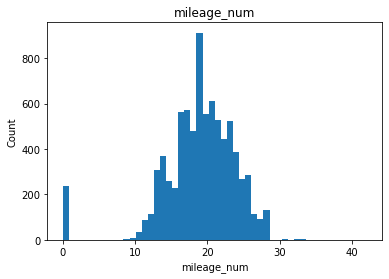

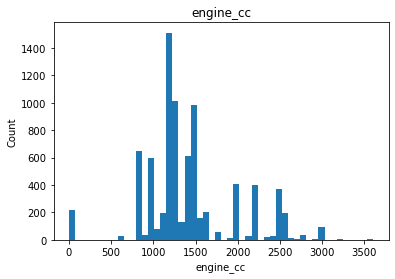

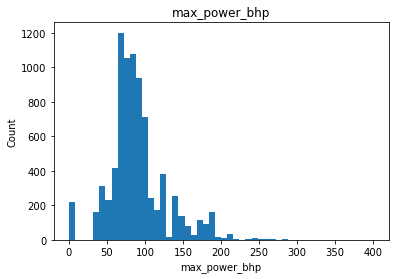

In [29]:
for feature in n_features:
    plt.hist(data[feature], bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [30]:
# fill nan seat values with median
median = data['seats'].median()
data['seats'].fillna(median, inplace=True)

In [31]:
for feature in n_features:
    mean = data[feature].mean()
    data[feature] = np.where(data[feature]==0, mean, data[feature])

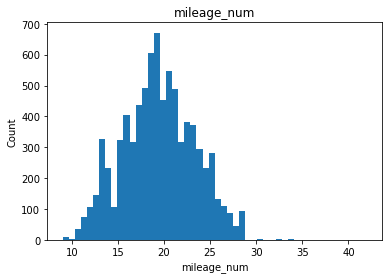

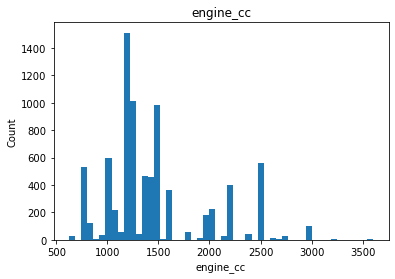

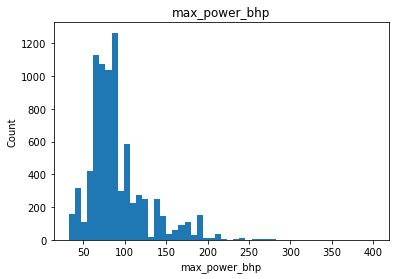

In [32]:
for feature in n_features:
    plt.hist(data[feature], bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [33]:
data.isnull().sum()

selling_price                   0
km_driven                       0
seats                           0
mileage_num                     0
engine_cc                       0
max_power_bhp                   0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
no_years                        0
dtype: int64

In [34]:
corr = data.corr()
corr['selling_price'].sort_values(ascending=False)

selling_price                   1.000000
max_power_bhp                   0.747023
engine_cc                       0.454633
fuel_Diesel                     0.206521
owner_Test Drive Car            0.115880
seats                           0.047135
seller_type_Trustmark Dealer    0.035084
fuel_LPG                       -0.037222
owner_Fourth & Above Owner     -0.075669
owner_Third Owner              -0.118956
mileage_num                    -0.125825
owner_Second Owner             -0.179881
fuel_Petrol                    -0.195975
km_driven                      -0.225534
seller_type_Individual         -0.386244
no_years                       -0.414092
transmission_Manual            -0.588845
Name: selling_price, dtype: float64

In [35]:
#data.to_csv('data.csv',index=False)

### Splitting data & Training the model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24)

#### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 271376.7121923393
MSE: 209619797108.74945
RMSE: 457842.54619765235
R2 score: 0.686485497557404


#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor()

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [51]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [52]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [54]:
rf_random.best_score_

-22673596007.037766

In [55]:
predictions=rf_random.predict(X_test)

C:\Users\mukul\anaconda3\envs\car\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

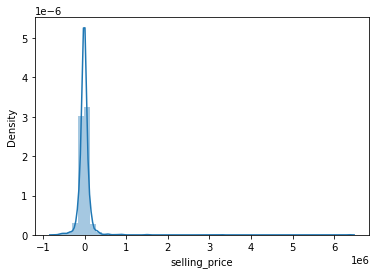

In [56]:
sns.distplot(y_test-predictions)

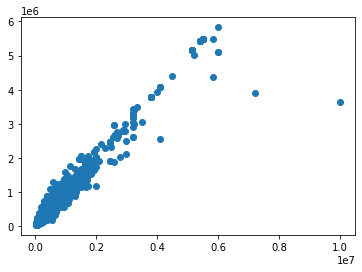

In [57]:
plt.scatter(y_test,predictions)

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 71296.09013055768
MSE: 35375921794.4981
RMSE: 188084.8792287623


In [59]:
print('R2 score:', metrics.r2_score(y_test, predictions))

R2 score: 0.9470905674329205


In [60]:
import pickle
# open a file, where you ant to store the data
#file = open('model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, open('rf_model.pkl', 'wb'))